In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import pickle

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# describe the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# to see if the data has null value or not
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
# sum of every null values
df.isnull().sum().sum()

np.int64(0)

In [10]:
# this is used to select specific columns from a Pandas DataFrame (df) and create a new DataFrame (df1) that includes only those columns. 
# The double square brackets [[...]] are used to select multiple columns by their names.
# This is the new DataFrame created to store only the selected columns from the original DataFrame.
df1 = df[['age','bmi','children']]

In [11]:
# to see the result
df1.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [12]:
# this is used for selecting single colums from the dataset
df2 = df['age']
df2.head()

0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64

In [13]:
# --.iloc is an indexer for integer-based position selection. 
#    It allows you to select rows and columns based on their numerical positions in the DataFrame.---
# here, slicing from 0 to 5 indexes
df.iloc[0:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# selecting the specific columns from the dataset 
df = df[['age', 'bmi', 'children', 'charges']]

In [15]:
# correlation matrix of the selected data (columns)
correlation_matrix = df.corr()

# print to see the matrix
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


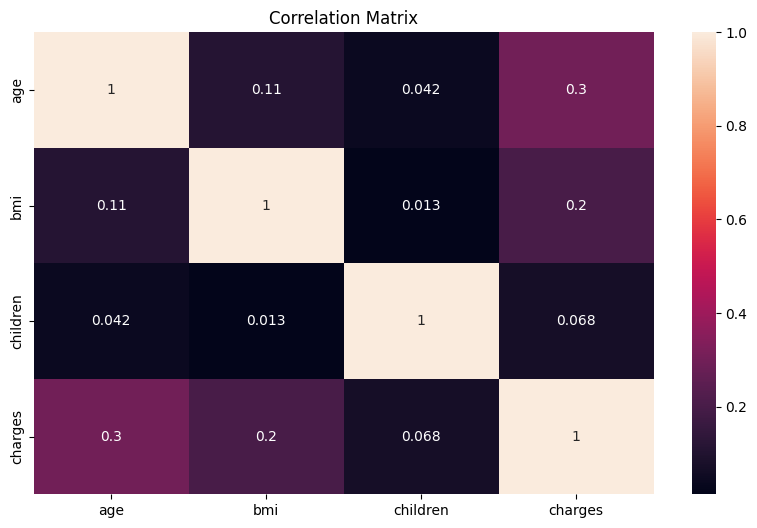

In [16]:
# plot the figure of correlation matrix using the seaborn library 
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

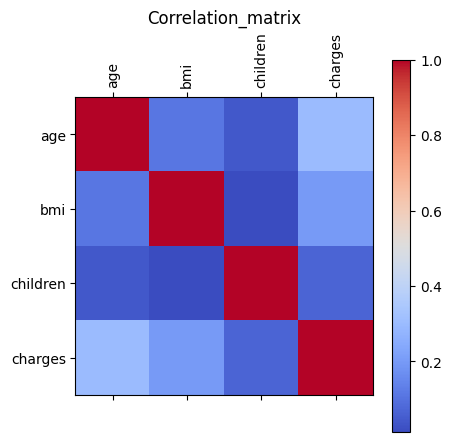

In [17]:
# plot the figure using the matplotlib library 
plt.figure(figsize=(10,6))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation_matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
# plt.grid(True)
plt.show()

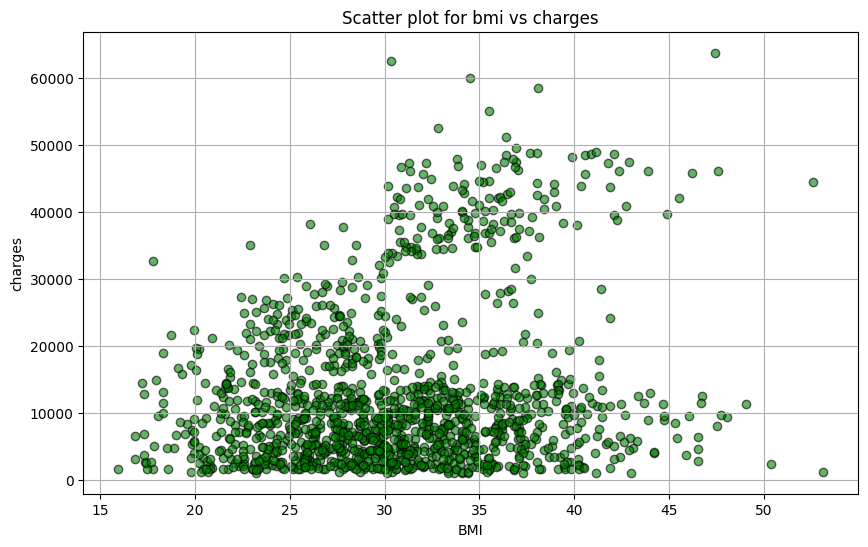

In [18]:
# scatter plot to see the data
plt.figure(figsize=(10,6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, color='green', edgecolor='black')
plt.title('Scatter plot for bmi vs charges')
plt.xlabel('BMI')
plt.ylabel('charges')
plt.grid(True)
plt.show()

In [19]:
# select the specific column to normalize for (X)
X = df[['age', 'bmi', 'children']]

# target variable meaning which is used for the predection
y = df['charges']

In [20]:
# MinMaxScaler or normalize the data
# The MinMaxScaler is a tool from sklearn used to scale features to a specified range, usually [0, 1].
# why?, Prevents features with larger ranges (e.g., age vs. bmi) from dominating others.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # fit_transform data transform(scale) the data i.e.[0, 1]

# print to see the scaled part of 'X' which is between [0,1]
print(X_scaled)

[[0.02173913 0.3212268  0.        ]
 [0.         0.47914985 0.2       ]
 [0.2173913  0.45843422 0.6       ]
 ...
 [0.         0.56201238 0.        ]
 [0.06521739 0.26472962 0.        ]
 [0.93478261 0.35270379 0.        ]]


In [21]:
# now, split the data into training and testing sets
# -- train_test_split(X_scaled(i.e. normalized form), y(target value), test_size=0.2(i.e.20% for testing, 80% for training),
# 
#     -- ("random_state=42"),  when you split data randomly (e.g., into training and testing sets), randomness is involved in 
#        choosing which data goes into the training set and which goes into the testing set.This is where "random_state" comes in.
#        it ensures that every time you split the data, you get the same random split. --
#    random_state=42
#    )--
X_train, X_test, y_trian, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# setting up the model 
# Linear Regression is a basic machine learning model used for predicting a continuous value based on input features (independent variables).

# --How Does the Model Learn?,
#    The linear regression algorithm works by finding the best-fitting line (or hyperplane, in higher dimensions) 
#    that minimizes the difference between the predicted values and the actual target values (y_train). ---

model = LinearRegression()

# fit(): This is the method used to train the model.
model.fit(X_train, y_trian)

LinearRegression()

In [23]:
# After training, the model is ready to make predictions using new data.
# make the predection
# the predetion is done from the testing so, we put the "X_test" to make the predection
y_pred = model.predict(X_test)

In [24]:
# print the predections and the actual value for the comparison
print(f'The Predicted Values are: {y_pred[:5]}')
print(f'The Actual Values are: {y_test.values[:5]}')

The Predicted Values are: [13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]
The Actual Values are: [ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918 ]


In [25]:
# calculating the errors using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 131201335.64669803


In [26]:
# calculate the error using the root mean squared error 
rmse = mse ** 2
print(f'Root Mean Square Error (RMSE): {rmse}')

Root Mean Square Error (RMSE): 1.7213790475477514e+16


In [28]:
# save the model using the pickle library
# dump the model
with open('model_saved/trained_model.pkl','wb') as file:
    pickle.dump(model, file)

In [29]:
# dumpe the scaler
with open('model_saved/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [31]:
# load the model => trained_model.pkl
with open('model_saved/trained_model.pkl','rb') as file:
     loaded_model = pickle.load(file)   

In [33]:
# load the model => scaler_model.pkl
with open('model_saved/scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

In [34]:
# predict the loaded model
y_predict = loaded_model.predict(X_test)
print("Prediction using the loaded model:")
print(y_pred[:5])

Prediction using the loaded model:
[13305.28945949 11801.95170145 16941.71437111 14278.42206855
  8680.25439362]


In [35]:
# providing the custom data o predict the model
custom_data = [10,27.900,7] 
# custom_data = np.array(custom_data).reshape(1,-1)
custom_data = pd.DataFrame([custom_data], columns=['age', 'bmi', 'children'])

In [36]:
# scaler.tranform() => This ensures the new input data is processed consistently with how the training data was processed.
custom_data_scaled = scaler.transform(custom_data)

In [37]:
y_pred_custom = loaded_model.predict(custom_data_scaled)
print("Custom Predection:")
print(y_pred_custom)

Custom Predection:
[9299.11657897]
